In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [4]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [6]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-07-31 06:28:46.501291: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [7]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [8]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
# Compile the model with SGD optimizer
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with SGD optimizer
history_sgd = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with Adam optimizer
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

# Compile the model with RMSprop optimizer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with RMSprop optimizer
history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

2023-07-31 06:29:55.709218: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2023-07-31 06:29:56.455647: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-31 06:29:56.463448: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1800000000 Hz


Epoch 1/20
  1/782 [..............................] - ETA: 7:30 - loss: 2.4404 - accuracy: 0.1406

2023-07-31 06:29:56.934374: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23592960 exceeds 10% of free system memory.
2023-07-31 06:29:56.935448: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 23592960 exceeds 10% of free system memory.
2023-07-31 06:29:56.968864: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21528576 exceeds 10% of free system memory.
2023-07-31 06:29:56.969224: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 21528576 exceeds 10% of free system memory.


782/782 [==============================] - 113s 144ms/step - loss: 2.3917 - accuracy: 0.1493 - val_loss: 2.1562 - val_accuracy: 0.2657
Epoch 2/20
782/782 [==============================] - 117s 150ms/step - loss: 2.1505 - accuracy: 0.2595 - val_loss: 1.9842 - val_accuracy: 0.3420
Epoch 3/20
782/782 [==============================] - 120s 153ms/step - loss: 2.0417 - accuracy: 0.3107 - val_loss: 1.9094 - val_accuracy: 0.3711
Epoch 4/20
782/782 [==============================] - 118s 150ms/step - loss: 1.9011 - accuracy: 0.3609 - val_loss: 1.7661 - val_accuracy: 0.4057
Epoch 5/20
782/782 [==============================] - 120s 154ms/step - loss: 1.7797 - accuracy: 0.3992 - val_loss: 1.6216 - val_accuracy: 0.4524
Epoch 6/20
782/782 [==============================] - 119s 152ms/step - loss: 1.6925 - accuracy: 0.4331 - val_loss: 1.5380 - val_accuracy: 0.4818
Epoch 7/20
782/782 [==============================] - 122s 157ms/step - loss: 1.6229 - accuracy: 0.4561 - val_loss: 1.5124 - val_accura

In [11]:
import matplotlib.pyplot as plt


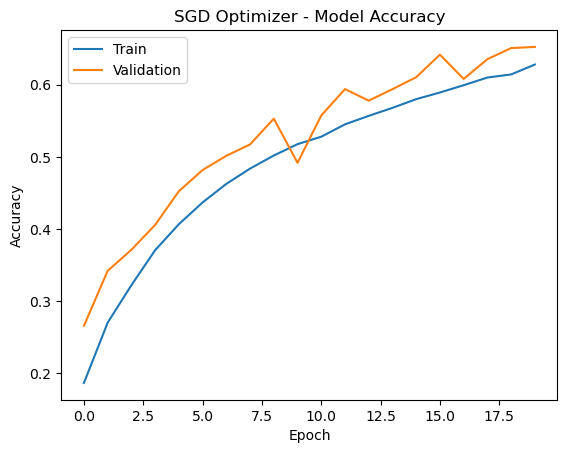

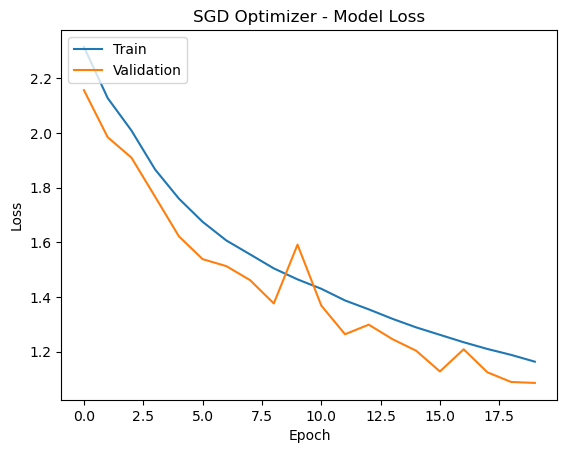

In [12]:
# Plot accuracy
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('SGD Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('SGD Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

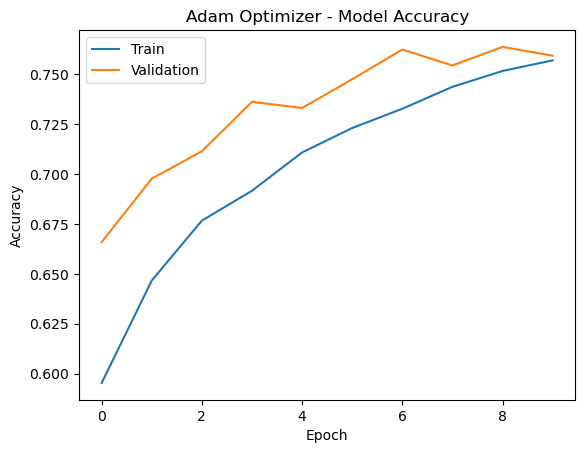

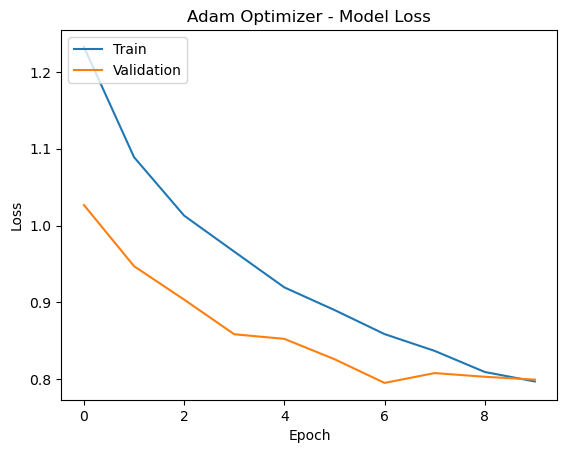

In [13]:
# Plot accuracy
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


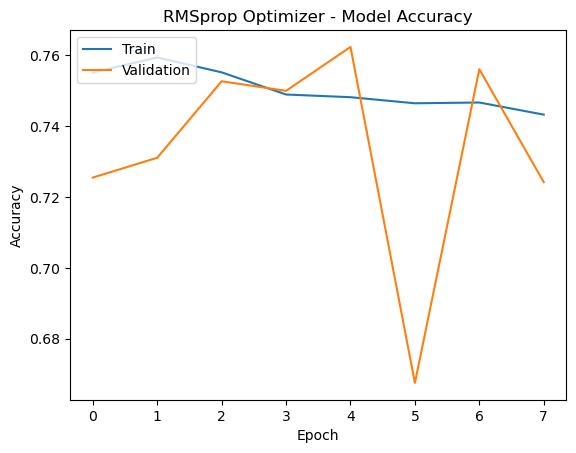

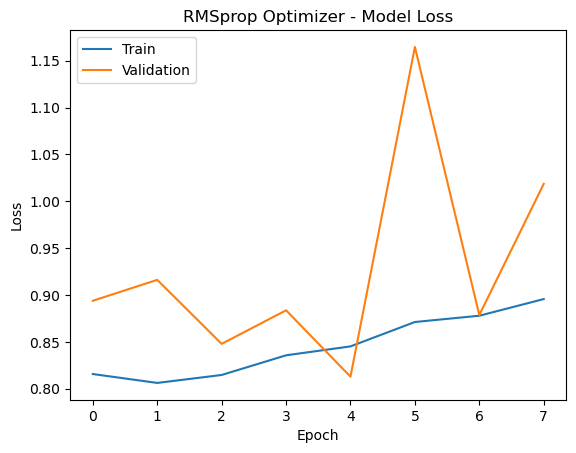

In [14]:
# Plot accuracy
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('RMSprop Optimizer - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop Optimizer - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Epoch 1/20
782/782 [==============================] - 126s 161ms/step - loss: 1.0002 - accuracy: 0.7232 - val_loss: 0.9121 - val_accuracy: 0.7480
Epoch 2/20
782/782 [==============================] - 135s 173ms/step - loss: 0.9720 - accuracy: 0.7293 - val_loss: 1.0149 - val_accuracy: 0.7178
Epoch 3/20
782/782 [==============================] - 122s 155ms/step - loss: 0.9638 - accuracy: 0.7322 - val_loss: 1.4332 - val_accuracy: 0.6014
